references:
1. Pytorch documentation / tutorials https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
2. https://www.youtube.com/watch?v=5rW_PZI4B2I
3. https://towardsdatascience.com/a-beginners-tutorial-on-building-an-ai-image-classifier-using-pytorch-6f85cb69cba7

In [0]:
# import tarfile
# import tarfile
# my_tar = tarfile.open('/content/drive/My Drive/cs175_data/test.tar.gz')
# my_tar.extractall('/content/drive/My Drive/cs175_data/') # specify which folder to extract to
# my_tar.close()

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torch.utils import data
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import transforms,datasets

import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
import pandas as pd
from pathlib import Path 
from imageio import imread
import timeit
import time
import shutil
class_dict = {"c0":"safe driving","c1":"texting - right","c2":"talking on the phone - right",
              "c3":"texting - left","c4":"talking on the phone - left","c5":"operating the radio",
              "c6":"drinking", "c7":"reaching behind","c8":"hair and makeup","c9":"talking to passenger"}
        

data_transforms = {
    'train': transforms.Compose([
                                 transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
                                      transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
                                      transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
torch.cuda.random.manual_seed(12345)
gpu_dtype = torch.cuda.FloatTensor

print_every = 100
np.random.seed(2020)

def train(model, loss_fn, optimizer, num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        model.train()
        for t, (x, y) in enumerate(train_loader):
            x_var = Variable(x.type(gpu_dtype))
            y_var = Variable(y.type(gpu_dtype).long())

            scores = model(x_var)
            
            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
def check_accuracy(model):
    print('Checking accuracy on validation set')  
    num_correct = 0
    num_samples = 0
    model.eval()
    for x, y in val_loader:
        x_var = Variable(x.type(gpu_dtype), volatile=True)

        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [0]:
#test_dataset = datasets.ImageFolder("/content/drive/My Drive/cs175_data/test", transform = data_transforms['test'])
train_dataset = datasets.ImageFolder("/content/drive/My Drive/cs175_data/train", transform = data_transforms['train'])
validation_dataset = datasets.ImageFolder("/content/drive/My Drive/cs175_data/validation", transform = data_transforms['validation'])


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size =32, shuffle=True, drop_last=True)
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size =32, shuffle=True)

RuntimeError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

t = Path('/content/drive/My Drive/cs175_data/test/test')

for i in t.iterdir():
  if i.name.startswith('._'):
    print(i)
    os.remove(i)
print('done')

OSError: ignored

In [0]:
def split_train_validation():
  train_folder = Path('/content/drive/My Drive/cs175_data/train')
  X = []
  Y = []

  for classname in train_folder.iterdir():
    for img in classname.iterdir():
      X.append(img)
      Y.append(classname.name)

  Xtr, Xva, Ytr, Yva = model_selection.train_test_split(X, Y, test_size=0.25, random_state=20)
  for i in range(len(Xva)):
    shutil.move(str(Xva[i]), '/content/drive/My Drive/cs175_data/validation/' + Yva[i])

split_train_validation()

KeyboardInterrupt: ignored

In [0]:
class_dict = {"c0":"safe driving","c1":"texting - right","c2":"talking on the phone - right",
              "c3":"texting - left","c4":"talking on the phone - left","c5":"operating the radio",
              "c6":"drinking", "c7":"reaching behind","c8":"hair and makeup","c9":"talking to passenger"}

In [0]:
data_transforms = {
    'train': transforms.Compose([
                                 transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
                                      transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
                                      transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
train_dataset = datasets.ImageFolder("/content/drive/My Drive/cs175_data/train", transform = data_transforms['train'])
validation_dataset = datasets.ImageFolder("/content/drive/My Drive/cs175_data/validation", transform = data_transforms['validation'])
test_dataset = datasets.ImageFolder("/content/drive/My Drive/cs175_data/test", transform = data_transforms['test'])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size =32, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size =32, shuffle=True)

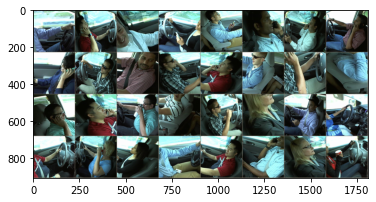

In [0]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

inputs, _ = next(iter(train_loader))
out = torchvision.utils.make_grid(inputs, nrow=8)
imshow(out)

In [0]:
torch.cuda.random.manual_seed(12345)
gpu_dtype = torch.cuda.FloatTensor

model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(8),
    nn.Conv2d(8, 16, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(16),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(5776, 1376),
    nn.ReLU(inplace=True),
    nn.Linear(1376, 10)
).type(gpu_dtype)

In [0]:
#to save params into a file
# torch.save(model.state_dict(), "/content/drive/My Drive/cs175_data/modelTest.pt")

In [0]:
#to load params from file

# model2.load_state_dict(torch.load("/content/drive/My Drive/cs175_data/modelTest.pt"))

<All keys matched successfully>

In [0]:
x = torch.randn(64, 3, 224, 224)
x_var = Variable(x.type(gpu_dtype))
ans = model(x_var)

np.array(ans.size())

array([64, 10])

In [0]:
print_every = 100
np.random.seed(2020)

def train(model, loss_fn, optimizer, num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        model.train()
        for t, (x, y) in enumerate(train_loader):
            x_var = Variable(x.type(gpu_dtype))
            y_var = Variable(y.type(gpu_dtype).long())

            scores = model(x_var)
            
            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
def check_accuracy(model):
    print('Checking accuracy on validation set')  
    num_correct = 0
    num_samples = 0
    model.eval()
    for x, y in val_loader:
        x_var = Variable(x.type(gpu_dtype), volatile=True)

        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

# model1 92.3%

In [0]:
model1 = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=48, stride=1),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(8),
    nn.Conv2d(8, 16, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(16),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(23104, 666),
    nn.ReLU(inplace=True),
    nn.Linear(666, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adadelta(model1.parameters(), lr=1e-1)
train(model1, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model1)
torch.save(model1.state_dict(), "/content/drive/My Drive/cs175_data/model1.pt")

Starting epoch 1 / 20
t = 100, loss = 2.4594
t = 200, loss = 2.4144
t = 300, loss = 2.0003
t = 400, loss = 2.2388
t = 500, loss = 2.2578
Starting epoch 2 / 20
t = 100, loss = 2.1720
t = 200, loss = 1.9391
t = 300, loss = 2.2662
t = 400, loss = 2.2677
t = 500, loss = 2.1718
Starting epoch 3 / 20
t = 100, loss = 1.8376
t = 200, loss = 1.9978
t = 300, loss = 1.8643
t = 400, loss = 1.8522
t = 500, loss = 1.9331
Starting epoch 4 / 20
t = 100, loss = 1.7340
t = 200, loss = 1.7259
t = 300, loss = 1.4002
t = 400, loss = 1.6395
t = 500, loss = 1.6728
Starting epoch 5 / 20
t = 100, loss = 1.4802
t = 200, loss = 1.5471
t = 300, loss = 1.6828
t = 400, loss = 1.5320
t = 500, loss = 1.4311
Starting epoch 6 / 20
t = 100, loss = 1.3206
t = 200, loss = 1.7816
t = 300, loss = 1.6493
t = 400, loss = 1.7482
t = 500, loss = 1.7164
Starting epoch 7 / 20
t = 100, loss = 1.4754
t = 200, loss = 1.1744
t = 300, loss = 1.4282
t = 400, loss = 1.7223
t = 500, loss = 1.5278
Starting epoch 8 / 20
t = 100, loss = 1.8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5169 / 5600 correct (92.30)


# model2 94.3%

In [0]:
model2 = nn.Sequential(
    nn.Conv2d(3, 9, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(9),
    nn.Conv2d(9, 18, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(18),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(6498, 1000),
    nn.ReLU(inplace=True),
    nn.Linear(1000, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adadelta(model2.parameters(), lr=1e-1)
train(model2, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model2)
torch.save(model2.state_dict(), "/content/drive/My Drive/cs175_data/model2.pt")

Starting epoch 1 / 20
t = 100, loss = 2.3490
t = 200, loss = 2.1826
t = 300, loss = 1.9584
t = 400, loss = 1.8393
t = 500, loss = 1.9979
Starting epoch 2 / 20
t = 100, loss = 1.9994
t = 200, loss = 2.1897
t = 300, loss = 1.8274
t = 400, loss = 1.9772
t = 500, loss = 1.5513
Starting epoch 3 / 20
t = 100, loss = 1.5024
t = 200, loss = 1.3955
t = 300, loss = 1.5424
t = 400, loss = 1.3536
t = 500, loss = 1.6166
Starting epoch 4 / 20
t = 100, loss = 1.3896
t = 200, loss = 1.5405
t = 300, loss = 1.3267
t = 400, loss = 1.2181
t = 500, loss = 1.4839
Starting epoch 5 / 20
t = 100, loss = 1.4341
t = 200, loss = 1.3122
t = 300, loss = 1.4481
t = 400, loss = 1.6169
t = 500, loss = 1.1279
Starting epoch 6 / 20
t = 100, loss = 1.5729
t = 200, loss = 1.3227
t = 300, loss = 1.2049
t = 400, loss = 1.1412
t = 500, loss = 1.1925
Starting epoch 7 / 20
t = 100, loss = 1.4826
t = 200, loss = 1.3597
t = 300, loss = 1.2861
t = 400, loss = 1.1031
t = 500, loss = 0.9950
Starting epoch 8 / 20
t = 100, loss = 1.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5316 / 5600 correct (94.93)


# Model3 92.3%


In [0]:
model3 = nn.Sequential(
    nn.Conv2d(3, 5, kernel_size=12, stride=1),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(5),
    nn.Conv2d(5, 7, kernel_size=24, stride=3),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(7),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(7168, 1000),
    nn.ReLU(inplace=True),
    nn.Linear(1000, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adadelta(model3.parameters(), lr=1e-1)
train(model3, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model3)
torch.save(model3.state_dict(), "/content/drive/My Drive/cs175_data/model3.pt")

Starting epoch 1 / 20
t = 100, loss = 2.2020
t = 200, loss = 2.3266
t = 300, loss = 2.1163
t = 400, loss = 1.9708
t = 500, loss = 2.0214
Starting epoch 2 / 20
t = 100, loss = 1.9748
t = 200, loss = 2.2127
t = 300, loss = 2.0074
t = 400, loss = 1.9990
t = 500, loss = 1.8116
Starting epoch 3 / 20
t = 100, loss = 1.9899
t = 200, loss = 1.5907
t = 300, loss = 1.5203
t = 400, loss = 1.7583
t = 500, loss = 1.6141
Starting epoch 4 / 20
t = 100, loss = 1.7180
t = 200, loss = 2.0060
t = 300, loss = 1.6369
t = 400, loss = 1.4087
t = 500, loss = 2.1279
Starting epoch 5 / 20
t = 100, loss = 1.6230
t = 200, loss = 1.3712
t = 300, loss = 1.5258
t = 400, loss = 1.5738
t = 500, loss = 1.6311
Starting epoch 6 / 20
t = 100, loss = 1.4880
t = 200, loss = 1.3271
t = 300, loss = 1.6876
t = 400, loss = 1.3848
t = 500, loss = 1.3508
Starting epoch 7 / 20
t = 100, loss = 1.8823
t = 200, loss = 1.5450
t = 300, loss = 1.3086
t = 400, loss = 1.3623
t = 500, loss = 1.3348
Starting epoch 8 / 20
t = 100, loss = 1.4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5168 / 5600 correct (92.29)


# model4 93.7%

In [0]:
model4 = nn.Sequential(
    nn.Conv2d(3, 6, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(6),
    nn.Conv2d(6, 12, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(12),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(4332, 1000),
    nn.ReLU(inplace=True),
    nn.Linear(1000, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adadelta(model4.parameters(), lr=1e-1)
train(model4, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model4)
torch.save(model4.state_dict(), "/content/drive/My Drive/cs175_data/model4.pt")

Starting epoch 1 / 20
t = 100, loss = 2.3213
t = 200, loss = 1.9204
t = 300, loss = 2.2253
t = 400, loss = 2.1726
t = 500, loss = 1.9899
Starting epoch 2 / 20
t = 100, loss = 2.0153
t = 200, loss = 1.8344
t = 300, loss = 1.7615
t = 400, loss = 1.7022
t = 500, loss = 1.8253
Starting epoch 3 / 20
t = 100, loss = 1.7607
t = 200, loss = 1.8861
t = 300, loss = 2.2434
t = 400, loss = 1.9345
t = 500, loss = 1.7429
Starting epoch 4 / 20
t = 100, loss = 1.7104
t = 200, loss = 1.6987
t = 300, loss = 1.8311
t = 400, loss = 1.5862
t = 500, loss = 1.3091
Starting epoch 5 / 20
t = 100, loss = 1.5731
t = 200, loss = 1.7085
t = 300, loss = 1.2594
t = 400, loss = 1.4848
t = 500, loss = 1.6021
Starting epoch 6 / 20
t = 100, loss = 1.5217
t = 200, loss = 1.3412
t = 300, loss = 1.2742
t = 400, loss = 1.3493
t = 500, loss = 1.6874
Starting epoch 7 / 20
t = 100, loss = 1.2607
t = 200, loss = 1.4033
t = 300, loss = 1.2268
t = 400, loss = 1.3495
t = 500, loss = 1.3899
Starting epoch 8 / 20
t = 100, loss = 1.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5249 / 5600 correct (93.73)


# model5 90.1%

In [0]:
model5 = nn.Sequential(
    nn.Conv2d(3, 9, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(9),
    nn.Conv2d(9, 18, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(18),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(6498, 1000),
    nn.ReLU(inplace=True),
    nn.Linear(1000, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adam(model5.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
train(model5, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model5)
torch.save(model5.state_dict(), "/content/drive/My Drive/cs175_data/model5.pt")

Starting epoch 1 / 20
t = 100, loss = 2.4931
t = 200, loss = 2.3106
t = 300, loss = 2.1481
t = 400, loss = 2.1586
t = 500, loss = 2.1011
Starting epoch 2 / 20
t = 100, loss = 2.0120
t = 200, loss = 1.9518
t = 300, loss = 2.0738
t = 400, loss = 1.9686
t = 500, loss = 2.0882
Starting epoch 3 / 20
t = 100, loss = 1.6825
t = 200, loss = 1.8375
t = 300, loss = 1.9953
t = 400, loss = 1.7263
t = 500, loss = 1.5180
Starting epoch 4 / 20
t = 100, loss = 1.8210
t = 200, loss = 1.8006
t = 300, loss = 1.5932
t = 400, loss = 1.5214
t = 500, loss = 1.4642
Starting epoch 5 / 20
t = 100, loss = 1.4007
t = 200, loss = 1.4491
t = 300, loss = 1.7013
t = 400, loss = 1.5746
t = 500, loss = 1.6704
Starting epoch 6 / 20
t = 200, loss = 1.4029
t = 300, loss = 1.8718
t = 400, loss = 2.0204
t = 500, loss = 1.6196
Starting epoch 7 / 20
t = 100, loss = 1.7404
t = 200, loss = 1.4660
t = 300, loss = 1.2773
t = 400, loss = 1.4135
t = 500, loss = 1.4620
Starting epoch 8 / 20
t = 100, loss = 1.1039
t = 200, loss = 1.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5095 / 5600 correct (90.98)


# model6 92.6%

In [0]:
model6 = nn.Sequential(
    nn.Conv2d(3, 9, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(9),
    nn.Conv2d(9, 18, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(18),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(6498, 1000),
    nn.ReLU(inplace=True),
    nn.Linear(1000, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adam(model6.parameters(), lr=0.00005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
train(model6, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model6)
torch.save(model6.state_dict(), "/content/drive/My Drive/cs175_data/model6.pt")

Starting epoch 1 / 20
t = 100, loss = 2.2297
t = 200, loss = 2.2050
t = 300, loss = 2.1202
t = 400, loss = 2.1179
t = 500, loss = 2.0874
Starting epoch 2 / 20
t = 100, loss = 2.0196
t = 200, loss = 1.8499
t = 300, loss = 1.7872
t = 400, loss = 1.8259
t = 500, loss = 1.7340
Starting epoch 3 / 20
t = 100, loss = 1.7599
t = 200, loss = 1.6801
t = 300, loss = 1.6469
t = 400, loss = 1.8154
t = 500, loss = 1.5979
Starting epoch 4 / 20
t = 100, loss = 1.5278
t = 200, loss = 1.3868
t = 300, loss = 1.6215
t = 400, loss = 1.3904
t = 500, loss = 1.6491
Starting epoch 5 / 20
t = 100, loss = 1.4310
t = 200, loss = 1.4559
t = 300, loss = 1.4791
t = 400, loss = 1.1543
t = 500, loss = 1.4165
Starting epoch 6 / 20
t = 100, loss = 1.4724
t = 200, loss = 1.3495
t = 300, loss = 1.7579
t = 400, loss = 1.1515
t = 500, loss = 1.4268
Starting epoch 7 / 20
t = 100, loss = 1.3634
t = 200, loss = 1.4477
t = 300, loss = 1.6719
t = 400, loss = 1.4277
t = 500, loss = 1.4709
Starting epoch 8 / 20
t = 100, loss = 1.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5186 / 5600 correct (92.61)


# model7 93.7


In [0]:
model7 = nn.Sequential(
    nn.Conv2d(3, 9, kernel_size=12, stride=1),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(9),
    nn.Conv2d(9, 18, kernel_size=12, stride=1),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(18),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(183618, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adam(model7.parameters(), lr=0.00005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
train(model7, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model7)
torch.save(model7.state_dict(), "/content/drive/My Drive/cs175_data/model7.pt")

Starting epoch 1 / 20
t = 100, loss = 2.2580
t = 200, loss = 2.1690
t = 300, loss = 2.2466
t = 400, loss = 2.1727
t = 500, loss = 2.2463
Starting epoch 2 / 20
t = 100, loss = 2.2751
t = 200, loss = 2.2259
t = 300, loss = 1.6811
t = 400, loss = 2.1311
t = 500, loss = 2.1120
Starting epoch 3 / 20
t = 100, loss = 1.9175
t = 200, loss = 1.5875
t = 300, loss = 1.9393
t = 400, loss = 1.6767
t = 500, loss = 1.6352
Starting epoch 4 / 20
t = 100, loss = 1.7245
t = 200, loss = 2.0851
t = 300, loss = 1.5322
t = 400, loss = 1.7748
t = 500, loss = 1.3840
Starting epoch 5 / 20
t = 100, loss = 1.3361
t = 200, loss = 1.7785
t = 300, loss = 1.3848
t = 400, loss = 1.8666
t = 500, loss = 1.4046
Starting epoch 6 / 20
t = 100, loss = 0.9295
t = 200, loss = 1.5136
t = 300, loss = 1.3249
t = 400, loss = 1.7197
t = 500, loss = 1.2546
Starting epoch 7 / 20
t = 100, loss = 1.1277
t = 200, loss = 1.1962
t = 300, loss = 1.6071
t = 400, loss = 1.3027
t = 500, loss = 1.4001
Starting epoch 8 / 20
t = 100, loss = 1.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5248 / 5600 correct (93.71)


# model8 95.4%

In [0]:
model8 = nn.Sequential(
    nn.Conv2d(3, 9, kernel_size=15, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(9),
    nn.Conv2d(9, 18, kernel_size=21, stride=1),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(18),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(31752, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adam(model8.parameters(), lr=0.00005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
train(model8, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model8)
torch.save(model8.state_dict(), "/content/drive/My Drive/cs175_data/model8.pt")

Starting epoch 1 / 20
t = 100, loss = 2.2954
t = 200, loss = 2.2291
t = 300, loss = 2.1984
t = 400, loss = 2.1231
t = 500, loss = 2.1017
Starting epoch 2 / 20
t = 100, loss = 1.9562
t = 200, loss = 1.7082
t = 300, loss = 2.0125
t = 400, loss = 1.7420
t = 500, loss = 1.7710
Starting epoch 3 / 20
t = 100, loss = 1.3835
t = 200, loss = 1.5732
t = 300, loss = 1.7310
t = 400, loss = 1.3413
t = 500, loss = 1.5364
Starting epoch 4 / 20
t = 100, loss = 1.5597
t = 200, loss = 1.3066
t = 300, loss = 1.5810
t = 400, loss = 1.4282
t = 500, loss = 1.2873
Starting epoch 5 / 20
t = 100, loss = 1.3338
t = 200, loss = 1.2936
t = 300, loss = 1.1190
t = 400, loss = 1.2199
t = 500, loss = 1.2116
Starting epoch 6 / 20
t = 100, loss = 1.3043
t = 200, loss = 1.1666
t = 300, loss = 1.3716
t = 400, loss = 1.3006
t = 500, loss = 0.9840
Starting epoch 7 / 20
t = 100, loss = 0.9601
t = 200, loss = 1.0710
t = 300, loss = 1.1031
t = 400, loss = 0.8970
t = 500, loss = 1.0305
Starting epoch 8 / 20
t = 100, loss = 1.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5340 / 5600 correct (95.36)


# model9 96.18

In [0]:
model9 = nn.Sequential(
    nn.Conv2d(3, 9, kernel_size=15, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(9),
    nn.Conv2d(9, 18, kernel_size=21, stride=1),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(18),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(31752, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adam(model9.parameters(), lr=0.00003, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
train(model9, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model9)
torch.save(model9.state_dict(), "/content/drive/My Drive/cs175_data/model9.pt")

Starting epoch 1 / 20
t = 100, loss = 2.4085
t = 200, loss = 2.4527
t = 300, loss = 2.1974
t = 400, loss = 2.2015
t = 500, loss = 1.9032
Starting epoch 2 / 20
t = 100, loss = 1.8286
t = 200, loss = 1.8334
t = 300, loss = 1.7831
t = 400, loss = 1.9449
t = 500, loss = 2.2559
Starting epoch 3 / 20
t = 100, loss = 1.6786
t = 200, loss = 1.6384
t = 300, loss = 1.4514
t = 400, loss = 1.8785
t = 500, loss = 1.2774
Starting epoch 4 / 20
t = 100, loss = 1.2685
t = 200, loss = 1.5869
t = 300, loss = 1.3326
t = 400, loss = 1.3005
t = 500, loss = 1.5173
Starting epoch 5 / 20
t = 100, loss = 1.5973
t = 200, loss = 1.5631
t = 300, loss = 1.4579
t = 400, loss = 1.1149
t = 500, loss = 1.5518
Starting epoch 6 / 20
t = 100, loss = 1.4453
t = 200, loss = 1.4288
t = 300, loss = 1.4034
t = 400, loss = 1.2122
t = 500, loss = 1.2977
Starting epoch 7 / 20
t = 100, loss = 1.3998
t = 200, loss = 1.2531
t = 300, loss = 1.0778
t = 400, loss = 1.3629
t = 500, loss = 1.4354
Starting epoch 8 / 20
t = 100, loss = 1.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5386 / 5600 correct (96.18)


# model10 95.46

In [0]:
model10 = nn.Sequential(
    nn.Conv2d(3, 9, kernel_size=15, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(9),
    nn.Conv2d(9, 18, kernel_size=21, stride=1),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(18),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(31752, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adam(model10.parameters(), lr=0.00003, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.00003, amsgrad=False)
train(model10, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)
check_accuracy(model10)
torch.save(model10.state_dict(), "/content/drive/My Drive/cs175_data/model10.pt")

Starting epoch 1 / 20
t = 100, loss = 2.1981
t = 200, loss = 2.3920
t = 300, loss = 2.0577
t = 400, loss = 2.2410
t = 500, loss = 2.1811
Starting epoch 2 / 20
t = 100, loss = 1.8502
t = 200, loss = 1.8537
t = 300, loss = 1.8243
t = 400, loss = 1.9876
t = 500, loss = 1.6479
Starting epoch 3 / 20
t = 100, loss = 1.5668
t = 200, loss = 1.2489
t = 300, loss = 1.7037
t = 400, loss = 1.5891
t = 500, loss = 1.3791
Starting epoch 4 / 20
t = 100, loss = 1.3635
t = 200, loss = 1.5338
t = 300, loss = 1.7974
t = 400, loss = 1.5147
t = 500, loss = 1.0708
Starting epoch 5 / 20
t = 100, loss = 1.7049
t = 200, loss = 1.3851
t = 300, loss = 1.3407
t = 400, loss = 1.9072
t = 500, loss = 1.5113
Starting epoch 6 / 20
t = 100, loss = 1.2266
t = 200, loss = 1.0254
t = 300, loss = 1.5452
t = 400, loss = 1.1472
t = 500, loss = 1.2355
Starting epoch 7 / 20
t = 100, loss = 1.1390
t = 200, loss = 1.2338
t = 300, loss = 0.9550
t = 400, loss = 1.3608
t = 500, loss = 1.3063
Starting epoch 8 / 20
t = 100, loss = 1.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5346 / 5600 correct (95.46)


# 93.9%


In [0]:
model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(8),
    nn.Conv2d(8, 16, kernel_size=24, stride=2),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(16),
    nn.MaxPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(5776, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 10)
).type(gpu_dtype)

t = time.time()
loss_fn = nn.CrossEntropyLoss().type(gpu_dtype)
optimizer = optim.Adadelta(model.parameters(), lr=1e-1)
train(model, loss_fn, optimizer, num_epochs=20)
print('time used:', time.time() - t)

Starting epoch 1 / 20
t = 100, loss = 2.2961
t = 200, loss = 2.2377
t = 300, loss = 2.3394
t = 400, loss = 1.9446
t = 500, loss = 1.8395
Starting epoch 2 / 20
t = 100, loss = 2.1924
t = 200, loss = 1.8866
t = 300, loss = 1.7647
t = 400, loss = 1.7061
t = 500, loss = 1.6418
Starting epoch 3 / 20
t = 100, loss = 1.7405
t = 200, loss = 1.5210
t = 300, loss = 1.5896
t = 400, loss = 1.5442
t = 500, loss = 1.4166
Starting epoch 4 / 20
t = 100, loss = 1.8419
t = 200, loss = 1.6274
t = 300, loss = 1.6771
t = 400, loss = 1.1897
t = 500, loss = 1.4759
Starting epoch 5 / 20
t = 100, loss = 1.6885
t = 200, loss = 1.3864
t = 300, loss = 1.2554
t = 400, loss = 1.7309
t = 500, loss = 1.8155
Starting epoch 6 / 20
t = 100, loss = 1.4657
t = 200, loss = 1.1630
t = 300, loss = 1.1936
t = 400, loss = 1.2205
t = 500, loss = 1.4717
Starting epoch 7 / 20
t = 100, loss = 1.2723
t = 200, loss = 1.2477
t = 300, loss = 1.2726
t = 400, loss = 1.0235
t = 500, loss = 1.5239
Starting epoch 8 / 20
t = 100, loss = 1.6

In [0]:
check_accuracy(model)

Checking accuracy on validation set


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 5256 / 5600 correct (93.86)


In [0]:
device = torch.device("cuda:0")
class_names = train_dataset.classes

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_dict[class_names[preds[j]]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

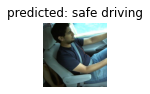

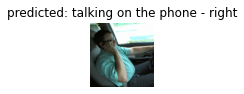

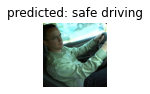

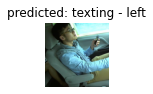

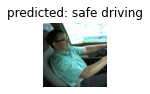

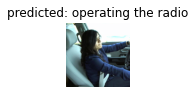

In [0]:
visualize_model(model,6)